In [2]:
### IMPORT ###
from coastcamDBfuncs import *
from coastcamDB_yaml_funcs import *
from coastcam_funcs import *
from rectifier_crs import *
from calibration_crs import *

In [3]:
#file should be in the same folder as notebook
filename = '1660734000.Wed.Aug.17_11_0_0.GMT.2022.examplexx.c1.snap.jpg' 
#local time of the station where the image was taken. eastern, pacific, or utc
timezone = 'eastern' 

In [4]:
#Need a csv file of parameters to connect to the database
#file will have: host, port, dbname, user, password
csv_file = "/home/jovyan/CoastCamDB/db_access.csv"
conn = DBConnectCSV(csv_file)

In [5]:
#filename2param() returns Parameter object (see coastcamDBfuncs)
parameters = filename2param(filename, conn, timezone)

Short name 'examplexx' found in filename 1660734000.Wed.Aug.17_11_0_0.GMT.2022.examplexx.c1.snap.jpg
SELECT * FROM camera WHERE stationID = '7654321' AND timeIN <= 1660734000 AND timeOUT >= 1660734000 


/srv/conda/envs/pangeo/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
/srv/conda/envs/pangeo/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
/srv/conda/envs/pangeo/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
/srv/conda/envs/pangeo/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connectio

In [6]:
#print attributes of Parameter object
print(parameters.extrinsics)
print(parameters.intrinsics)
print(parameters.metadata)
print(parameters.localOrigin)
print(parameters.dateTimeObj)
print(parameters.dateTimeStr)
print(parameters.tzone)

[{'x': 323057.7330506754, 'y': 3075921.151034901, 'z': 19.61473416816073, 'a': 4.920894950951808, 't': 1.224378784860994, 'r': 0.007522770665513}, {'x': 323057.390424243, 'y': 3075921.92758973, 'z': 19.8225129549294, 'a': 4.22754097296514, 't': 1.29776233472373, 'r': -0.0861389774081618}]
[{'NU': 2448, 'NV': 2048, 'fx': 2489.7675309712, 'fy': 2491.97465755424, 'c0U': 1274.80079178084, 'c0V': 1070.76475682497, 'd1': -0.176453397004305, 'd2': 0.072283126283243, 'd3': 0.105991004054627, 't1': 0.002224202095617, 't2': 0.002842123733732}, {'NU': 2448, 'NV': 2048, 'fx': 3722.49271076636, 'fy': 3724.23959575309, 'c0U': 1377.37609148303, 'c0V': 1077.76336550548, 'd1': -0.222347133817209, 'd2': 0.79907175214222, 'd3': -3.07114534173783, 't1': 0.00251827008335466, 't2': 0.00426709440522072}]
[{'name': 'example site station', 'serial_number': '1', 'camera_number': 1, 'calibration_date': 1660734000, 'coordinate_system': 'geo'}, {'name': 'example site station', 'serial_number': '2', 'camera_number'

In [7]:
#Set up parameters to perform rectification
imageFiles = ['1660734000.Wed.Aug.17_11_0_0.GMT.2022.examplexx.c1.timex.jpg', '1660734000.Wed.Aug.17_11_0_0.GMT.2022.examplexx.c2.timex.jpg']

calibration = CameraCalibration(parameters.metadata[0],parameters.intrinsics[0],parameters.extrinsics[0],parameters.localOrigin)

xmin = -10
xmax = 400
ymin = -400
ymax = 0
dx = 1.
dy = 1.
z =  0.

rectifier_grid = TargetGrid(
    [xmin, xmax],
    [ymin, ymax],
    dx,
    dy,
    z
)

rectifier = Rectifier(
    rectifier_grid
)

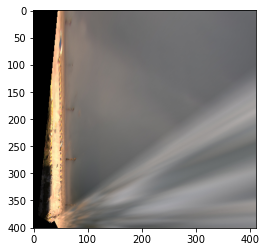

In [8]:
#rectify image
rectifiedImage = rectifier.rectify_images(parameters.metadata[0], imageFiles, parameters.intrinsics, parameters.extrinsics, parameters.localOrigin)
plt.imshow(rectifiedImage.astype(int))
plt.show()